## Updated Alpha Vantage and Pandas Class Project

In [1]:
# Variable Definitions 

# Exercise 1 - change the requested information below
# 
# Note that NOT all items need to be changed - see comments below

your_name="mikepando"  # put your name here

api_key="FXF3SXFDW943GPFJ"  # put your API key here

company_name="NVIDIA"    # put the name of the company whose stock you are going to plot

stock_symbol="NVDA"         # put the stock symbol you want to look up
                            # for example Amazon is AMZN, Microsoft is MSFT

url="https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol="+stock_symbol
url=url+"&interval=5min&datatype=csv&apikey="+api_key   # you do NOT need to change this

project_filename="av_project.html"   # filename to be used for HTML file, you do NOT need to change this

# run this cell

In [2]:
# We are going to be generating an HTML page containing hourly plots of closing prices
# 
# The name of the HTML file is stored in the project_filename variable (defined above)
#
# First we need to open the file - we get back a handle that we can
# use to write data to the file

def startWebPage(project_filename,company_name,your_name):
    handle=open(project_filename,"w")

    # Now we will write out the first few line of HTML for a web page to the file
    handle.write("<!DOCTYPE html><html>\n")
    handle.write("<head><title>Final Project</title></head>\n")
    handle.write("<body>\n")
    handle.write("<center>\n")
    handle.write("<h2>"+company_name+":Intra-Day Closing Values</h2>\n")
    # the following img tag will show a stock-related image on our web page - feel free to replace the URL if you wish
    handle.write("<img src='https://www.kiplinger.com/slideshow/investing/T052-S001-10-small-cap-growth-stocks-to-buy-now/images/intro.jpg' height=180, width=800>\n")
    handle.write("<h3>By"+your_name+"</h3>\n")
    handle.write("</center>\n")

    return handle

In [3]:
# Exercise #2
#
# Test your function by running the following code.

handle=startWebPage(project_filename,company_name,your_name)
handle.close()

# Once run, the above code should create a file named project.html in
# the directory that contains this notebook
# 
# Try to open that file in a browser - either by double clicking on the 
# project.html icon in the directory or pressing CTRL-o (note this is the letter O - for open)
# and then browsing to find the project.html file
#
# Once loaded into the web browser you should see a web page with just a few lines of text
# and an image.

In [4]:
# We are going to use Pandas for this lab so we need to import it

import pandas as pd     # pd will be an alias for pandas

# run this cell

In [5]:
# Read the CSV file returned by the given URL - this returns a Pandas dataframe

data=pd.read_csv(url)

# run this cell

In [6]:
# After issuing the following command you should
# see the first five records of the data table (dataframe)

data.head()

# run this cell

,timestamp,open,high,low,close,volume
0,2019-04-25 16:00:00,186.86,187.1400,186.780,186.8400,333057
1,2019-04-25 15:55:00,186.58,186.9500,186.390,186.8300,204563
2,2019-04-25 15:50:00,186.94,187.0300,186.530,186.5700,119216
3,2019-04-25 15:45:00,186.78,186.9600,186.655,186.9350,107208
4,2019-04-25 15:40:00,187.03,187.0542,186.530,186.7984,94558


In [7]:
# Exercise #3 

# Dataframes can be saved to CSV files - which can also be read by Excel
# Lets save our data in a csv file using the dataframe to_csv method

data.to_csv("stock_project.csv")

# Then open the file in Excel - it is located in the same folder as this jupyter notebook

In [8]:
# Convert the timestamp from string to Pandas datetime type
# this will allow us to extract the various parts of the date - day, hour, minutes
# 
data.timestamp=pd.to_datetime(data.timestamp)

# run this cell

In [9]:
# Place the hour in its own column
data["hour"]=data.timestamp.dt.hour

# run this cell

In [10]:
# Exercise 4:
#
# Write and then run the code needed to extract the minute from each timestamp
# The minute should be stored in its own column named "minute" 

# The code is very similar to the above code used to store the hour

data["minute"]=data.timestamp.dt.minute

In [11]:
# Make sure the two extra columns (hour and minute) have been created -
# they should appear when you execute the following command
# which will display the first five rows
data.head()

# run this cell

,timestamp,open,high,low,close,volume,hour,minute
0,2019-04-25 16:00:00,186.86,187.1400,186.780,186.8400,333057,16,0
1,2019-04-25 15:55:00,186.58,186.9500,186.390,186.8300,204563,15,55
2,2019-04-25 15:50:00,186.94,187.0300,186.530,186.5700,119216,15,50
3,2019-04-25 15:45:00,186.78,186.9600,186.655,186.9350,107208,15,45
4,2019-04-25 15:40:00,187.03,187.0542,186.530,186.7984,94558,15,40


In [12]:
# Since your dataset represents a 24 hour time series it
# is possible that two days worth of data are stored in the table

# A simple way to check is to ask for the max and min of the timestamp
# column

minDate=data.timestamp.min()
maxDate=data.timestamp.max()
print("The minDate is",minDate)
print("The maxDate is",maxDate)

# run this cell

The minDate is 2019-04-24 14:15:00
The maxDate is 2019-04-25 16:00:00


In [13]:
# Even though we have a most two dates in our table
# lets create a list of those dates
# so that we can eventually use a for-loop
# to execute the same code for both dates

if minDate.day!=maxDate.day:
    daysList=[minDate,maxDate]    # two days in time series
else:
    daysList=[minDate]    # only one day in the time series

print(daysList)

# run this cell

[Timestamp('2019-04-24 14:15:00'), Timestamp('2019-04-25 16:00:00')]


In [14]:
# We can now write the for-loop that will 
# first extract and then process the data for each day in daysList

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))

# run this cell

Data for 4/24/2019
Data for 4/25/2019


In [15]:
# Exercise 5:
#
# Copy the above for loop code to this cell
#
# For each day we need to find the first
# and last hour of trading data - 
# since we are plotting each hour of trading data.
#
# At the bottom of the code body of the for-loop
# define two new variables:
#
# The first variable, named startHour should 
# contain the minimum hour in the oneDayData.hour column.
# 
# The second variable, named endHour should
# contain the maximum hour in the oneDayData.hour column.
#
# You can also print the two variables to make sure
# you are getting the expected data.
#
# Remember that the hours will be represented using the 24 hour
# representation - so 14 represents 2PM.

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    print(startHour,endHour)


# run this cell once you have added the code

Data for 4/24/2019
14 16
Data for 4/25/2019
9 16


In [16]:
# Exercise 6:
#
# Copy the above for-loop code to this cell

# We now know the start hour of the data and end hour of the data (for each day)
#
# We will use another for-loop to iterate over the hours of data we have (for each day)
#
# For example for one day we may have trading data for hour 13 (1PM) to hour 16 (4PM).
# we want our second (inner) for loop to go from 13 to 16 (but not include 16 - we will
# plot data at 5 minute intervals for hour 15 to 16 - but we have no data after hour 16)
# 
# INSIDE (and indented under) the body of the for-loop add another for-loop indexed on letter j.
# This for loop should generate all the numbers between startHour and endHour.
# The range function will be very helpful here.
# 
# You can add a print statement inside the second for-loop to make sure the
# correct numbers are being generated. Remember this print statement
# will be indented under the SECOND (inner) for-loop.
# 

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    print(startHour,endHour)
    for x in range(startHour,endHour):
        print(x)

# run this cell once you have added the code

Data for 4/24/2019
14 16
14
15
Data for 4/25/2019
9 16
9
10
11
12
13
14
15


In [17]:
# Exercise 7:
#
# Copy the above for-loop code to this cell
#
# We want to plot the 5 minute interval closing data for each hour.
# Our second for-loop is generating each hour that we will plot.
#
# Therefore we need to extract the 5 minute trading data for the particular hour
# that is represented by j (the index of the second for-loop)
# 
# We can accomplish this with the following line
# oneHourData=oneDayData[oneDayData.hour==j]
# 
# Notice that the above code assigns the extracted data
# to a new table (dataframe) named oneHourData
#
# Add the above oneHourData assignment indented INSIDE the SECOND FOR LOOP
#
# On the line following the assignment to oneHourData add a 
# print statement that prints the oneHourData table,
# so that you can see some of the data in that table
# This print statement should also be indented INSIDE the SECOND FOR LOOP
# 
# If you wish you can comment out the other previous print statements

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        print(oneHourData)


# run this cell once you have added the code

             timestamp      open      high      low     close  volume  hour  \
91 2019-04-24 14:55:00  192.6000  192.7300  192.520  192.6400   59327    14   
92 2019-04-24 14:50:00  192.3550  192.6000  192.340  192.6000   77785    14   
93 2019-04-24 14:45:00  192.2000  192.3824  192.120  192.3303   30162    14   
94 2019-04-24 14:40:00  192.2200  192.2500  192.070  192.1900   28873    14   
95 2019-04-24 14:35:00  192.1860  192.3132  192.000  192.2000   48173    14   
96 2019-04-24 14:30:00  192.2656  192.3200  192.170  192.1701   34116    14   
97 2019-04-24 14:25:00  192.3000  192.3834  192.240  192.3100   28043    14   
98 2019-04-24 14:20:00  192.3800  192.4000  192.210  192.2700   33848    14   
99 2019-04-24 14:15:00  192.0270  192.4400  192.027  192.3900  102820    14   

    minute  
91      55  
92      50  
93      45  
94      40  
95      35  
96      30  
97      25  
98      20  
99      15  
             timestamp      open      high       low    close  volume  hour  \


In [18]:
# Exercise 8:
#
# Copy the above for-loop code to this cell
#
# One way to easily create a plot is to extract
# the two columns that you wish to plot and assign one
# of them as the index - the index will become the x-axis of the plot
# 
# First we need to extract the two columns
# 
# Indented under the second for-loop add the code
# to extract the two columns named "minute" and "close"
# from the oneHourData table (dataframe).
# 
# The resulting table should be assigned to the variable name plotData
# We did this in class - you will need put "minute" and "close" into a list
# So your added code will start look similar to this following
# plotData=oneHourData[# add your code here]
#
# You can comment out the print statement above the last plotData statement
# and add another print statement after the plotData assignment
# that displays the head of plotData.

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        print(plotData.head())

# run this cell once you have added the code

    minute     close
91      55  192.6400
92      50  192.6000
93      45  192.3303
94      40  192.1900
95      35  192.2000
    minute    close
79      55  191.561
80      50  192.010
81      45  192.190
82      40  192.100
83      35  192.220
    minute     close
73      55  187.3500
74      50  187.4500
75      45  187.6200
76      40  187.9299
77      35  188.0300
    minute     close
61      55  184.7000
62      50  185.0093
63      45  184.8180
64      40  185.0600
65      35  185.0869
    minute     close
49      55  186.8500
50      50  186.8500
51      45  186.6200
52      40  186.5653
53      35  185.6850
    minute     close
37      55  187.6900
38      50  187.1200
39      45  186.8700
40      40  186.8500
41      35  186.9101
    minute     close
25      55  186.9728
26      50  187.2100
27      45  187.3680
28      40  187.5100
29      35  187.4300
    minute     close
13      55  187.9400
14      50  188.1075
15      45  187.8950
16      40  188.0321
17      35  188.205

In [19]:
# Exercise 9:
#
# Copy the above for-loop code to this cell
#
# We need to make the minute column the index 
# and then sort the index so that we plot sorted numbers on the x-axis
# 
# Add the following code indented under the SECOND FOR-LOOP
# Note that the set_index and sort_index methods generate
# copies of the column so we just re-assign it to plotData
# as shown below.
#
#       plotData=plotData.set_index("minute")
#       plotData=plotData.sort_index()
#
# Move the previous print statement (that printed the plotData) to
# the line right after these two statements so that you can see what the data looks
# like after the set_index and sort_index methods are executed.
#

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        print(plotData.head())


# run this cell once you have added the code

           close
minute          
15      192.3900
20      192.2700
25      192.3100
30      192.1701
35      192.2000
         close
minute        
0       192.68
5       192.56
10      192.60
15      192.40
20      192.30
           close
minute          
35      188.0300
40      187.9299
45      187.6200
50      187.4500
55      187.3500
           close
minute          
0       187.2918
5       187.6229
10      186.5500
15      185.2000
20      185.6100
           close
minute          
0       185.3796
5       185.6700
10      184.8350
15      185.1100
20      184.8058
           close
minute          
0       186.7300
5       186.8600
10      186.6500
15      186.6606
20      186.8000
          close
minute         
0       187.690
5       187.530
10      187.540
15      187.165
20      187.270
         close
minute        
0       187.18
5       187.37
10      187.98
15      188.20
20      188.20
          close
minute         
0       188.165
5       187.800
10      187.420
15 

In [20]:
# In order to see the plots within a jupyter notebook
# execute this cell - DO NOT ADD THIS CODE TO YOUR FOR-LOOP - it is not python code
%matplotlib inline

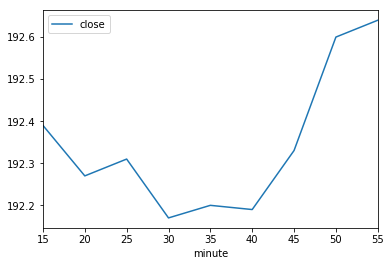

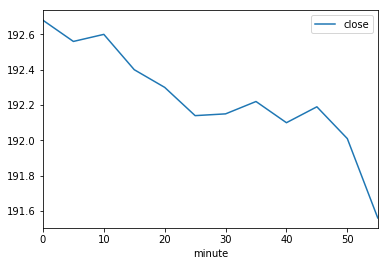

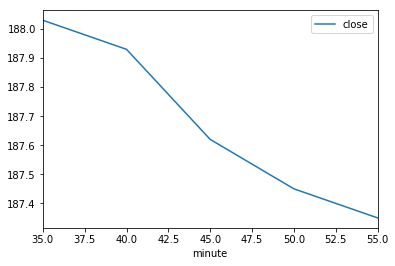

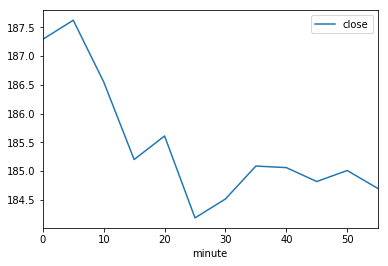

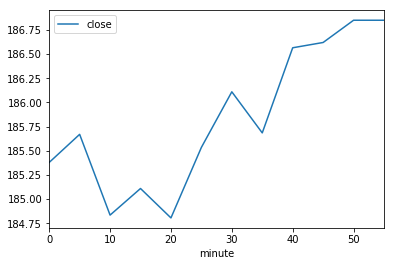

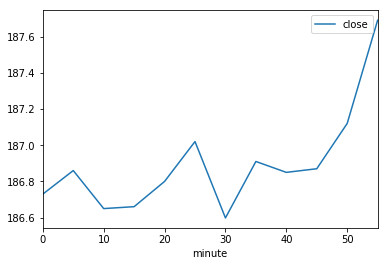

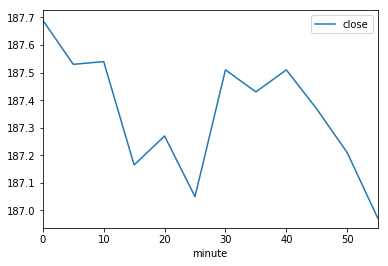

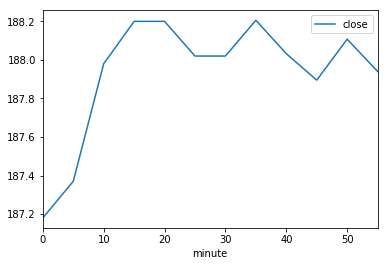

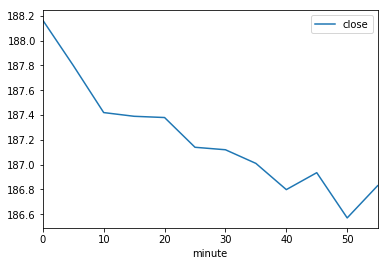

In [21]:
# Exercise 10:
#
# Copy the above for loop code to this cell
#
# You can comment out the last print statement
# Right below the print statement add the statement
# plotData.plot()
#
# The above statement should be indented under the second for-loop
# When you execute this cell you should see the plots

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        plotData.plot()


# run this cell once you have added the code

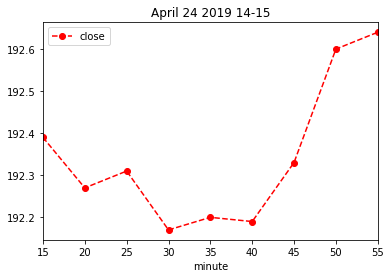

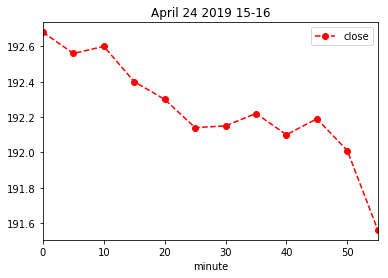

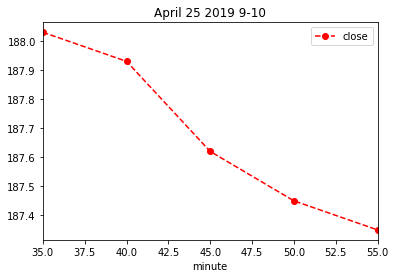

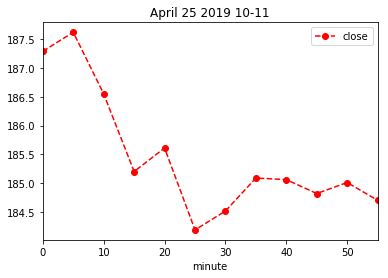

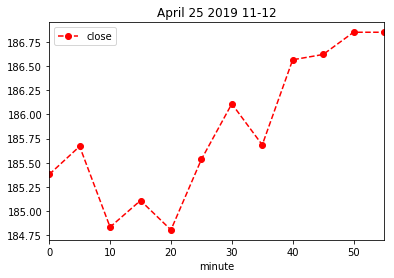

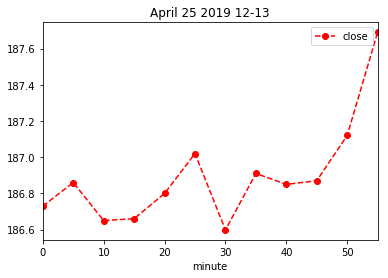

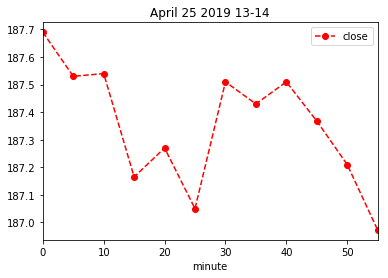

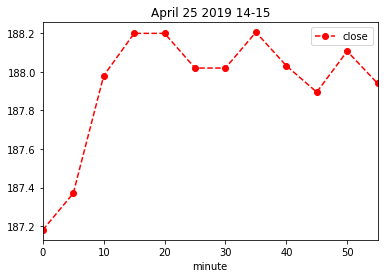

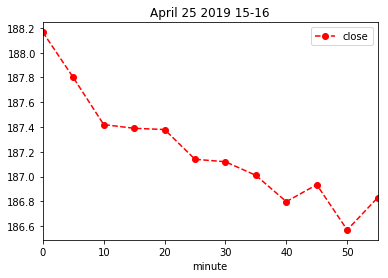

In [25]:
# Exercise 11:

# Copy the above for-loop code to this cell
#
# the plot function supports a number of arguments
# to enhance the plot. Arguments can be named - that is
# when you pass in the arguments you can pass them in any order
# as long as your specify what they are.
#
# Replace the plotData.plot() command with the following two lines
#
#        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
#        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)
#
# The first line generates an plot title for the plot, and the second added line performs
# the plot with the specified arguments.


for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)

#I removed ' str(i.month_name())+" "+ ' from plotTitle because I couldn't get
#the code to run. It said timestamp did not have attribute month_name
        
# run this cell once you have added the code

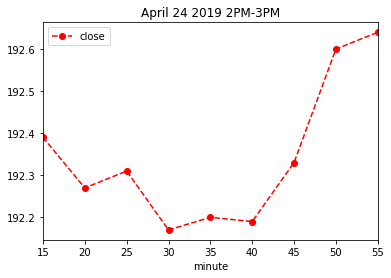

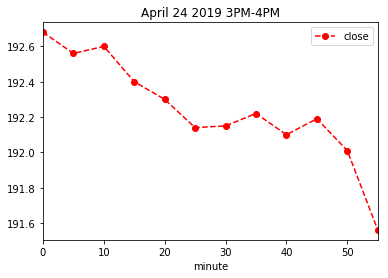

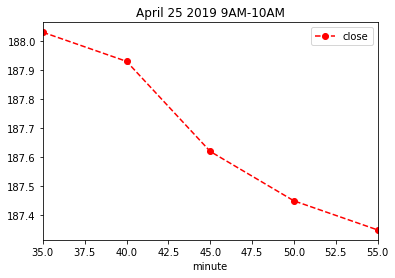

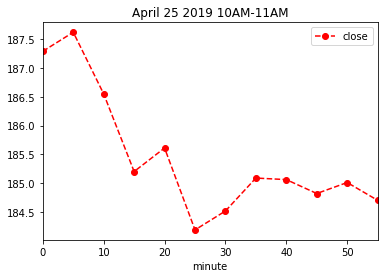

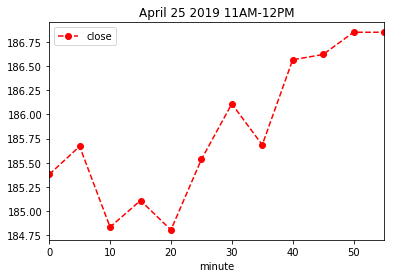

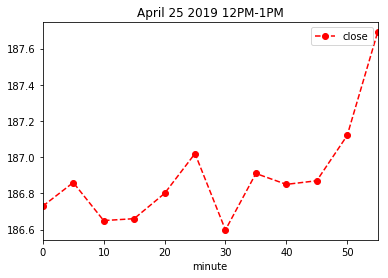

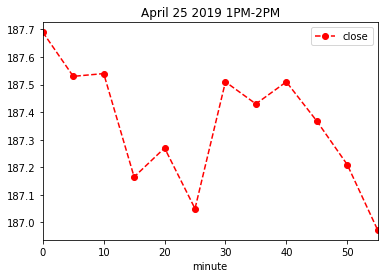

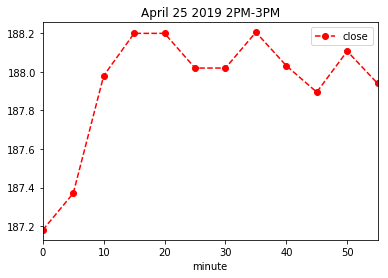

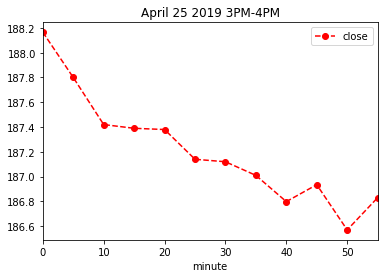

In [30]:
# Exercise 12:

# Copy the above for-loop code to this cell
#
# If you look at the plot titles the hours are still in 24 hour time.
#
# It would be nicer to label them with 12 hour time - using AM and PM 
# For example hour 14 is 2PM and hour 11 is 11AM.
#
# We will need to modify the last two entries of the plotTitle variable
#
# Using an if statement we can determine the appropriate labels for the time
# Replace the current plotTitle assignment with the following lines (all indented under the second for loop):
# Note that you need to add some of your own code
#
#        if j<11:
#            leftLabel=str(j)+"AM"
#            rightLabel=str(j+1)+"AM"
#        elif j==11:
#            leftLabel="11AM"
#            rightLabel="12PM"
#        elif j==12:
#            leftLabel=# add your code here
#            rightLabel=# add your code here
#        else:
#            leftLabel=# add your code here
#            rightLabel=# add your code here
#            
#        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        #plotTitle=str(i.month)+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)
        
# run this cell once you have added the code
# The 12 hour-based time (with AM and PM) should appear in the plot title when you execute the code.

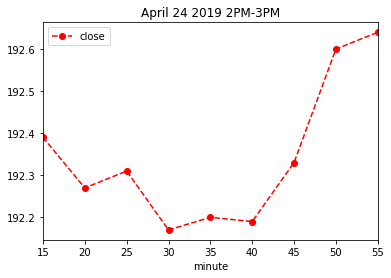

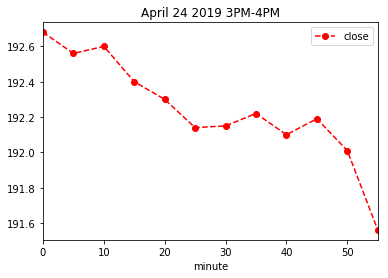

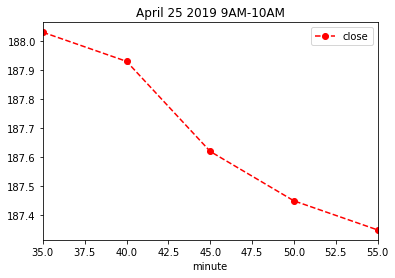

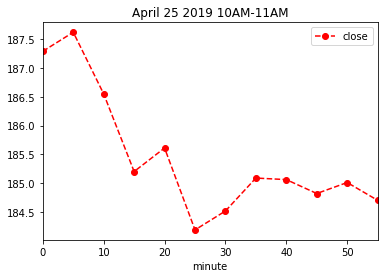

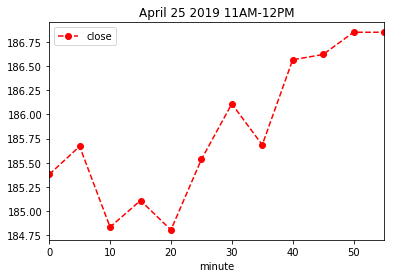

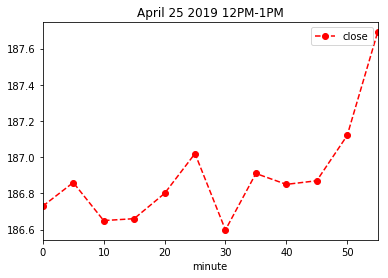

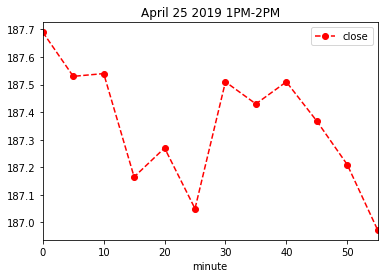

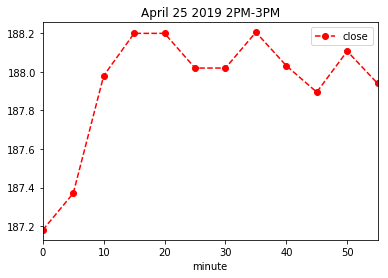

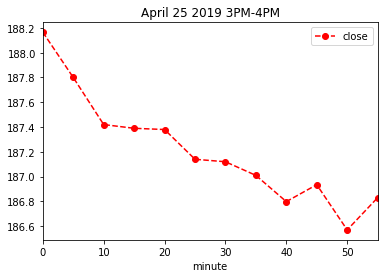

In [31]:
# Exercise 13:

# Copy the above for-loop code to this cell
#
# Since we are building a web page we
# need to save the plots to files - these files will be read by the web browser
# 
# Replace the plotData.plot line with the following two lines that will save the plot to a file
#
#        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
#        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)
#
# Note that the first list creates the file name to save the plot under - in this case plot_day_hour.png
# png is a graphics format - similar to GIF or JPG, this is the default format produced by the pandas plot function.
#

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        #plotTitle=str(i.month)+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        #plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)
        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)

# run this cell once you have added the code
# After you run this code you should notice the plot png files are listed in the same directory (folder) as this code


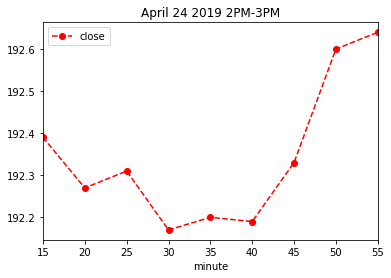

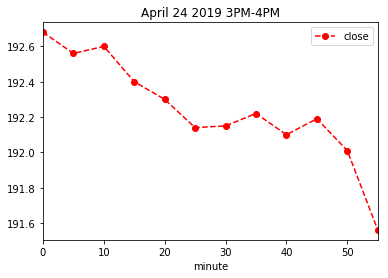

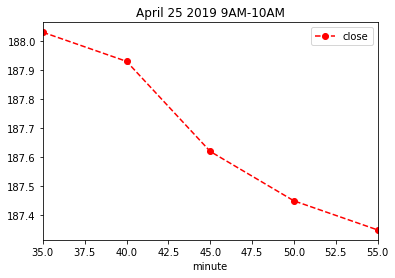

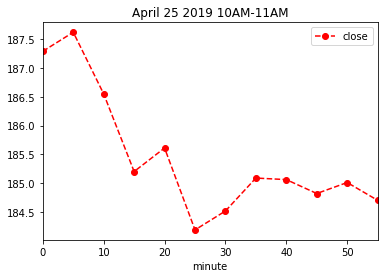

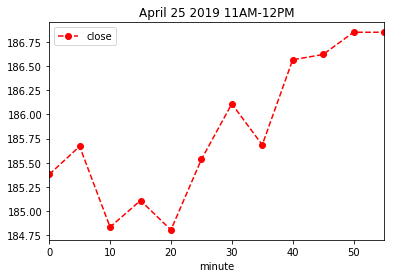

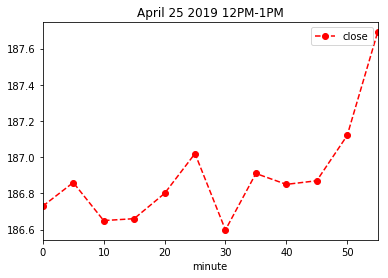

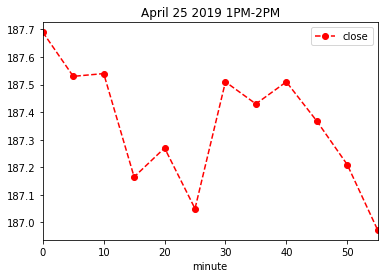

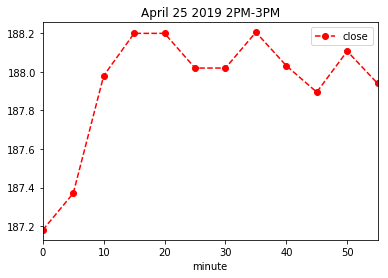

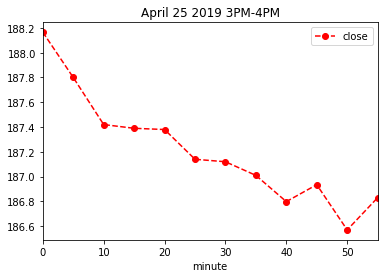

In [32]:
# Exercise 14:

# Copy the above for-loop code to this cell
#
# We are almost done - we just need to write the HTML that will tell the browser
# to read the png images.
# We also need to close the file we are writing.
# 
# Right before our first line of code (BEFORE the FIRST for-loop) add the
# following code:
#
# handle=startWebPage(project_filename,company_name,your_name)
#
# This is the same code we started the lab with - it opens and writes some HTML to the file.
#
# Right under the last line (the plot statement) add the following - indented under the second for-loop
# handle.write("<img src='"+figureFileName+"'><br>\n")
#
# The above just writes out the HTML needed to tell the browser to load our PNG plot file
# 
# Finally add the following two lines of code at the END of your program 
# THEY SHOULD NOT BE INDENTED under any loop - they will not be part of any looping code
#
# handle.write("</body></html>")
# handle.close()
# 
# The first statement just closes the HTML body and the last closes the file.
# In all programming languages files need to be closed when they are no longer being used.

handle=startWebPage(project_filename,company_name,your_name)
for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)
        handle.write("<img src='"+figureFileName+"'><br>\n")
handle.write("</body></html>")
handle.close()

# run this cell once you have added the code

In [29]:
# After you execute the code in the above cell
# you should find a project.html file in the same
# directory (folder) that contains this code (jupyter notebook).
#
# Open that file in a web browser - it should look similar to the
# sample final project output I have placed in Moodle.
#